In [1]:
import pandas as pd 
import plotly.express as px 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np





In [2]:
df = pd.read_csv("train.csv")
pd.set_option("display.max_columns", None)

In [3]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [5]:
df['month'] = df['datetime'].dt.month

In [6]:
df['day'] = df['datetime'].dt.day

In [7]:
df['hours'] = df['datetime'].dt.hour

In [8]:
for i in range(1,13):
    month_mask = (df['month'] == i)
    if i == 1 or i == 2 or i == 12:
        df.loc[month_mask, 'season'] = 4
    elif i == 3 or i == 4 or i == 5:
        df.loc[month_mask, 'season'] = 1
    elif i == 6 or i == 7 or i == 8:
        df.loc[month_mask, 'season'] = 2
    else:
        df.loc[month_mask, 'season'] = 3

In [9]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hours
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,19,22


In [10]:
df['week'] = df['datetime'].dt.day_name()

In [11]:
df['date'] = df['datetime'].dt.date

In [12]:
plt.figure(figsize=(200, 200))


<Figure size 14400x14400 with 0 Axes>

<Figure size 14400x14400 with 0 Axes>

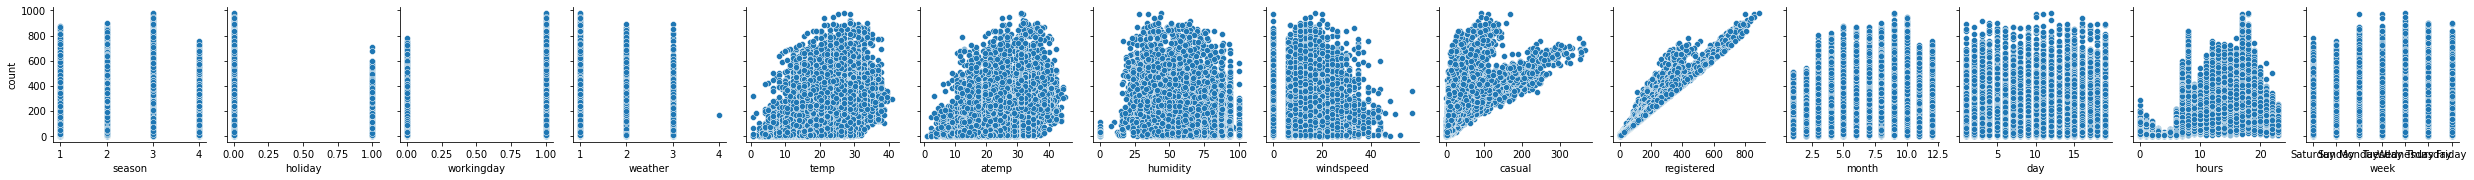

In [13]:
ax = sns.pairplot(data=df, x_vars=df.drop(['count', 'datetime', 'date'], axis=1).columns, y_vars='count')
plt.show(ax)


<Figure size 1440x1440 with 0 Axes>

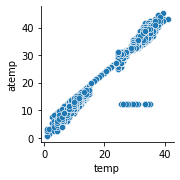

In [14]:
plt.figure(figsize=(20,20))
ax = sns.pairplot(data=df, x_vars=['temp'], y_vars='atemp')

plt.show()

In [15]:
df.loc[(df['atemp'] == 12.12) & (df['temp']>20), 'atemp'] = df.loc[(df['atemp'] == 12.12) & (df['temp']>20), 'temp'] 


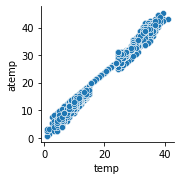

In [16]:
ax = sns.pairplot(data=df, x_vars=['temp'], y_vars='atemp')

In [17]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
month         0
day           0
hours         0
week          0
date          0
dtype: int64

In [18]:
mask_2011 = (df['datetime'].dt.year == 2011)
df.loc[mask_2011]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hours,week,date
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1,0,Saturday,2011-01-01
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1,Saturday,2011-01-01
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,2,Saturday,2011-01-01
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,3,Saturday,2011-01-01
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1,4,Saturday,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,2011-12-19 19:00:00,4,0,1,2,14.76,17.425,53,11.0014,17,234,251,12,19,19,Monday,2011-12-19
5418,2011-12-19 20:00:00,4,0,1,1,16.40,20.455,40,11.0014,9,197,206,12,19,20,Monday,2011-12-19
5419,2011-12-19 21:00:00,4,0,1,2,14.76,17.425,53,8.9981,15,112,127,12,19,21,Monday,2011-12-19
5420,2011-12-19 22:00:00,4,0,1,2,14.76,17.425,57,11.0014,12,95,107,12,19,22,Monday,2011-12-19


In [19]:
mask_2012 = (df['datetime'].dt.year == 2012) 
df.loc[mask_2012 & (df['month']>7)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hours,week,date
8607,2012-08-01 00:00:00,2,0,1,1,27.88,31.820,79,11.0014,3,44,47,8,1,0,Wednesday,2012-08-01
8608,2012-08-01 01:00:00,2,0,1,1,27.06,30.305,83,6.0032,5,28,33,8,1,1,Wednesday,2012-08-01
8609,2012-08-01 02:00:00,2,0,1,1,26.24,28.790,83,7.0015,0,13,13,8,1,2,Wednesday,2012-08-01
8610,2012-08-01 03:00:00,2,0,1,1,26.24,28.790,83,7.0015,0,7,7,8,1,3,Wednesday,2012-08-01
8611,2012-08-01 04:00:00,2,0,1,2,26.24,29.545,78,8.9981,1,3,4,8,1,4,Wednesday,2012-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,19,19,Wednesday,2012-12-19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,19,20,Wednesday,2012-12-19
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,19,21,Wednesday,2012-12-19
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,19,22,Wednesday,2012-12-19


In [20]:
df['difference_atemp_temp'] = df['atemp'] - df['temp']

In [21]:
from dython.nominal import associations

## heat map 

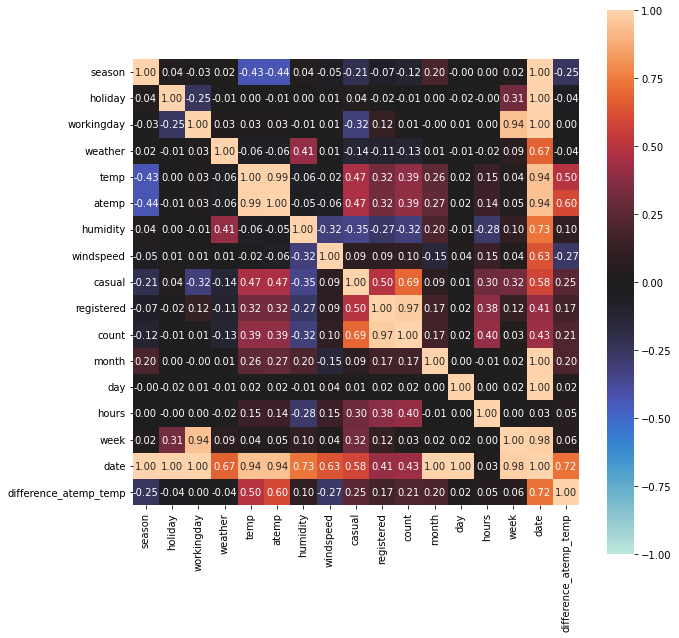

In [22]:
selected_column= df
categorical_df = selected_column.copy()
categorical_correlation= associations(categorical_df.drop('datetime', inplace=False, axis=1), filename= 'categorical_correlation.png', figsize=(10,10))

<AxesSubplot:>

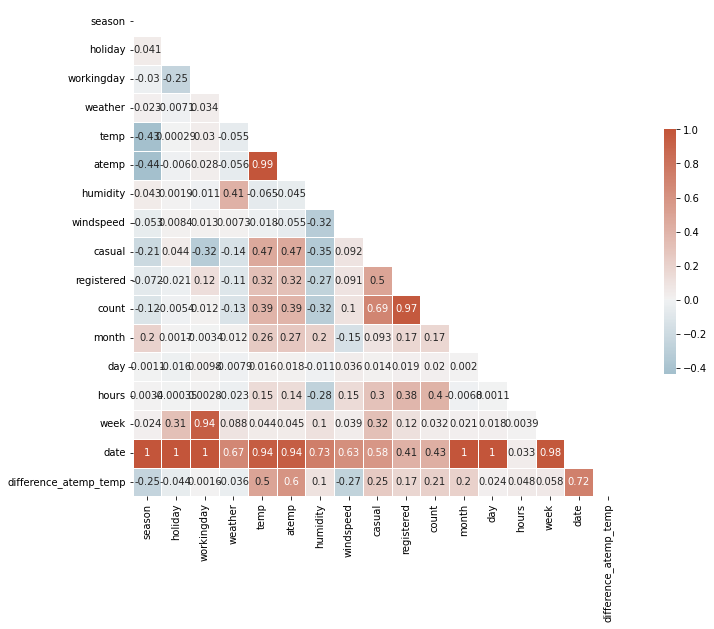

In [23]:
mask = np.triu(np.ones_like(categorical_correlation['corr'], dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(categorical_correlation['corr'], mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler, FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [25]:
X = df.drop(['count', 'datetime', 'casual', 'registered', 'date', 'season', 'atemp', 'difference_atemp_temp', 'day'], axis = 1)

y = df['count']


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [27]:
categorial = ['weather', 'week','month', 'hours', 'workingday', 'holiday']
continuous = ['temp','humidity', 'windspeed']
preprocessor = make_column_transformer((OneHotEncoder(),categorial), (StandardScaler(), continuous), remainder='passthrough')

X_train.weather.unique()

array([2, 1, 3, 4])

# grid search cv 

In [28]:
# parameters = {'criterion': ['squared_error', 'absolute_error', 'poisson'],
# 'min_samples_split': (2, 3, 5, 10),
#  'min_samples_leaf': (1, 2, 3 , 5, 10), 
#  'max_features': ['auto', 'sqrt', 'log2'], 
#  'max_leaf_nodes': (None, 10, 50, 60, 100), 
#  'min_impurity_decrease': (0.001, 0.0, 0.1, 0.5), 
#  'oob_score': [True, False], 
#  'warm_start': [True, False],
#  'ccp_alpha': (0.0, 0.001, 0.01, 0.1, 0.5)}

# parameter = {'criterion': ['squared_error', 'absolute_error', 'poisson']}

# features = preprocessor.fit_transform(X_train)
# model =  RandomForestRegressor()
# gridsearch = make_pipeline(GridSearchCV(model, parameters))
# gridsearch.fit(features, y_train)

In [29]:
model = make_pipeline(preprocessor,RandomForestRegressor())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.845875232928561

In [30]:

y_vrai = pd.DataFrame(y_test)


In [31]:
y_vrai['pred'] = y_pred

In [35]:
X['day'] = 'Weekend'

In [36]:
df.loc[(df['workingday']== 1 ), 'day'] = 'Working day'

,holiday,workingday,weather,temp,humidity,windspeed,month,hours,week,day
0,0,0,1,9.84,81,0.0000,1,0,Saturday,Weekend
1,0,0,1,9.02,80,0.0000,1,1,Saturday,Weekend
2,0,0,1,9.02,80,0.0000,1,2,Saturday,Weekend
3,0,0,1,9.84,75,0.0000,1,3,Saturday,Weekend
4,0,0,1,9.84,75,0.0000,1,4,Saturday,Weekend
...,...,...,...,...,...,...,...,...,...,...
10881,0,1,1,15.58,50,26.0027,12,19,Wednesday,Weekend
10882,0,1,1,14.76,57,15.0013,12,20,Wednesday,Weekend
10883,0,1,1,13.94,61,15.0013,12,21,Wednesday,Weekend
10884,0,1,1,13.94,61,6.0032,12,22,Wednesday,Weekend


In [33]:
import pickle

In [34]:
with open('model_picklee', 'wb') as f:
    pickle.dump(model, f)